# Think Bayes
This notebook is meant to cover the code aspect of Bayes theorem. 
Bayes theorem offers a logical way of doing data science. 
(code inspired from: https://github.com/tirthajyoti/Stats-Maths-with-Python/blob/master/Bayes_rule.ipynb)
- We start with a hypothesis. Then, we gather data, and update our initial belief. If the data supports the hypothesis then the probability goes up, if does not match, then probability goes down. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

Suppose that a test for using a particular drug is 97% sensitive and 95% specific.

That is the test will produce 97% true positive results for drug users and 95% true negative results for non drug-users.

Suppose that 0.5% of the general population are users of the drug. What is the probability that a randomly selected individual with a positive test is a drug user?

In [13]:
# Custom Function
def drug_user(prob_th=0.5, sensitivity=0.99, specificity=0.99, prev=0.01, verbose=True):

    p_user = prev
    p_non_user = 1-prev
    p_pos_user = sensitivity
    p_neg_user = specificity
    p_pos_non_user = 1-specificity

    num = p_pos_user*p_user
    dem = p_pos_user*p_user+p_pos_non_user*p_non_user

    prob = num/dem

    if verbose:
        if prob > prob_th:
            print('The tes-taker could be an user')
        else: 
            print ('The test-taker may not be an user')
    
    return prob

In [15]:
p = drug_user (prob_th=0.5, sensitivity=0.97, specificity=0.95, prev=0.005)
print ('Probability', round(p,4))

The test-taker may not be an user
Probability 0.0888


Even with a test that is 97% correct for catching positive cases and 95% correct for rejecting negative cases, the true probability of being a drug-user with a positive is only 8.9%

This is because of extremely low prevelance rate. The number of false positives outweighs the number of true positives

Let's see how the probability changes with prevelance rate


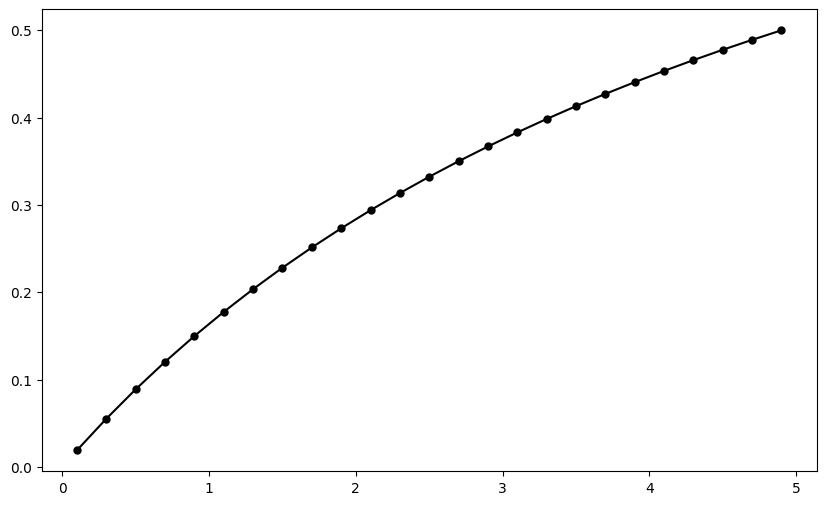

In [18]:
ps = []
pres = []

for pre in [i*0.001 for i in range(1,51,2)]:
    pres.append(pre*100)
    p = drug_user (prob_th=0.5, sensitivity=0.97, specificity=0.95, prev=pre, verbose=False)
    ps.append(p)

plt.figure(figsize=(10,6))
plt.plot(pres,ps,color='k', marker='o', markersize=5)
plt.show()